In [1]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/opt/conda/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import warnings
warnings.filterwarnings("ignore")

validation data를 가지고 inference를 수행해서 결과를 분석해야 할 것 같다.

In [3]:
true_label = pd.read_csv("../dataset/train/dev_final.csv") # label to num이 필요.
inference_label = pd.read_csv("prediction/submission.csv") # label을 int로 변형하고 load.

In [4]:
label_to_num = {'no_relation': 0, 'org:top_members/employees': 1, 'org:members': 2, 'org:product': 3, 'per:title': 4, 'org:alternate_names': 5, 'per:employee_of': 6, \
                'org:place_of_headquarters': 7, 'per:product': 8, 'org:number_of_employees/members': 9, 'per:children': 10, 'per:place_of_residence': 11, 'per:alternate_names': 12, \
                'per:other_family': 13, 'per:colleagues': 14, 'per:origin': 15, 'per:siblings': 16, 'per:spouse': 17, 'org:founded': 18, 'org:political/religious_affiliation': 19, \
                'org:member_of': 20, 'per:parents': 21, 'org:dissolved': 22, 'per:schools_attended': 23, 'per:date_of_death': 24, 'per:date_of_birth': 25, 'per:place_of_birth': 26, \
                'per:place_of_death': 27, 'org:founded_by': 28, 'per:religion': 29}

In [5]:
num_to_label = {0: 'no_relation', 1: 'org:top_members/employees', 2: 'org:members', 3: 'org:product', 4: 'per:title', 5: 'org:alternate_names', 6: \
                'per:employee_of', 7: 'org:place_of_headquarters', 8: 'per:product', 9: 'org:number_of_employees/members', 10: 'per:children', 11: 'per:place_of_residence', \
                12: 'per:alternate_names', 13: 'per:other_family', 14: 'per:colleagues', 15: 'per:origin', 16: 'per:siblings', 17: 'per:spouse', 18: 'org:founded', \
                19: 'org:political/religious_affiliation', 20: 'org:member_of', 21: 'per:parents', 22: 'org:dissolved', 23: 'per:schools_attended', 24: 'per:date_of_death', \
                25: 'per:date_of_birth', 26: 'per:place_of_birth', 27: 'per:place_of_death', 28: 'org:founded_by', 29: 'per:religion'}

In [6]:
label_to_num = sorted(label_to_num.items(), key=lambda kv:kv[1])
label_to_num = {each[0]:each[1] for each in label_to_num}

### confusion matrix 생성

In [7]:
actual = list(true_label.label.map(label_to_num))
predicted = list(inference_label.pred_label)

In [8]:
confusion_matrix = metrics.confusion_matrix(actual, predicted)

In [9]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = list(label_to_num.keys()))

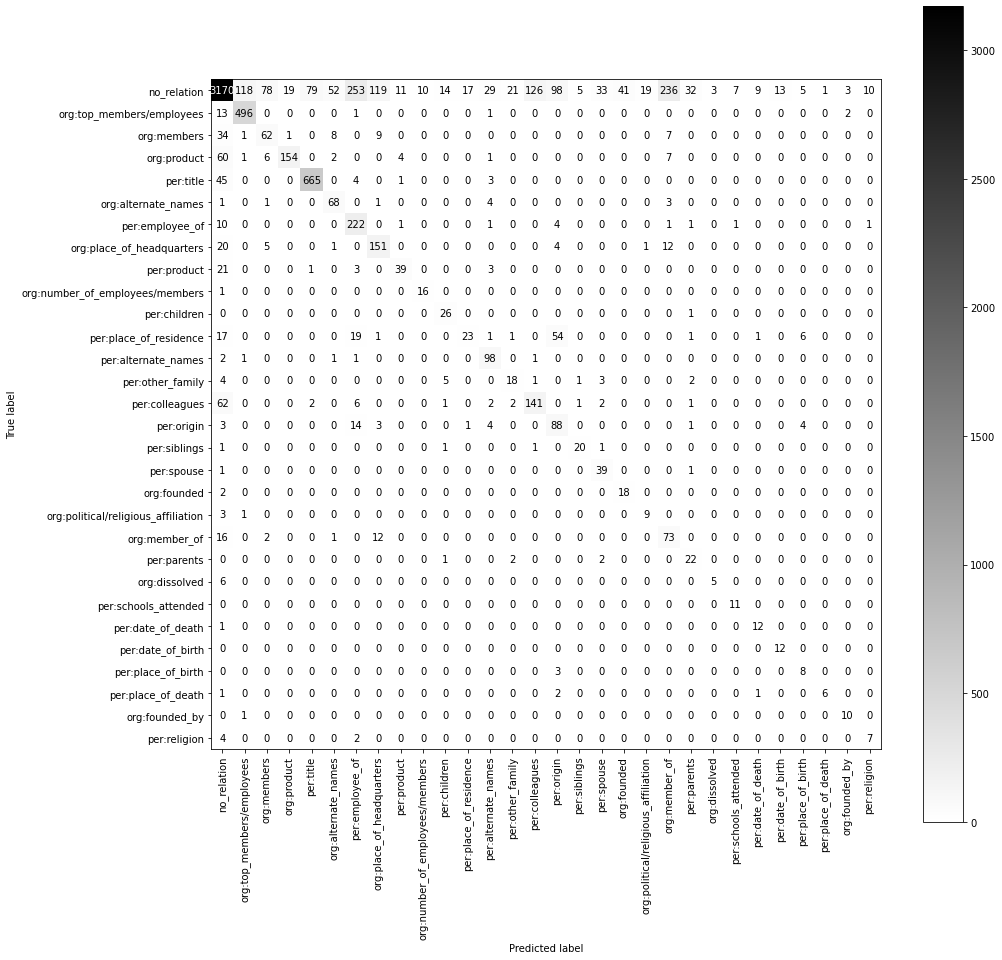

In [10]:
fig, ax = plt.subplots(figsize=(15,15))
cm_display.plot(ax=ax, cmap="binary", xticks_rotation='vertical')
plt.show()

predict label과 true label이 다른 dev data sentence 확인

In [35]:
num2id = {0: 'no_relation', 1: 'org:top_members/employees', 2: 'org:members', 3: 'org:product', 4: 'per:title', 5: 'org:alternate_names', 6: \
        'per:employee_of', 7: 'org:place_of_headquarters', 8: 'per:product', 9: 'org:number_of_employees/members', 10: 'per:children', 11: 'per:place_of_residence', \
        12: 'per:alternate_names', 13: 'per:other_family', 14: 'per:colleagues', 15: 'per:origin', 16: 'per:siblings', 17: 'per:spouse', 18: 'org:founded', \
        19: 'org:political/religious_affiliation', 20: 'org:member_of', 21: 'per:parents', 22: 'org:dissolved', 23: 'per:schools_attended', 24: 'per:date_of_death', \
        25: 'per:date_of_birth', 26: 'per:place_of_birth', 27: 'per:place_of_death', 28: 'org:founded_by', 29: 'per:religion'}

In [39]:
label_list = []
for i in range(len(predicted)):
    label_list.append(num2id[predicted[i]])

In [43]:
true_label["predict_label"] = label_list
true_label[true_label["label"] != label_list]

,Unnamed: 0,id,sentence,label,source,subject_word,subject_start_idx,subject_end_idx,subject_type,object_word,object_start_idx,object_end_idx,object_type,entity_pair,predict_label
10,20422,20422,구체적인 실행 방안으로 경기도시공사는 2024년까지 고양관광문화단지 내 기업성장센터...,no_relation,wikitree,고양시,83,85,ORG,경기도,13,15,ORG,ORG-ORG,org:member_of
12,13282,13282,1335년 아부 사이드 칸이 죽자 그의 뒤를 이어 아르파 케운이 칸이 되었다.,per:colleagues,wikipedia,아르파 케운,28,33,PER,아부 사이드,6,11,PER,PER-PER,no_relation
13,6297,6297,"통일민주당 후보 선출 문제를 놓고 논란을 빚던 1987년 8월 11일, 김영삼은 김...",no_relation,wikipedia,김대중,45,47,PER,민주당,2,4,ORG,PER-ORG,per:employee_of
15,1916,1916,"정종순 장흥군수는 ""전라남도교육청, 장흥군교육지원청, 장흥군체육회와 긴밀한 협조관계...",no_relation,wikitree,장흥군,30,32,ORG,전라남도,11,14,ORG,ORG-ORG,org:member_of
18,275,275,그러나 지난해 YG엔터테인먼트가 '버닝썬 게이트'에 휩싸인 데다 수장이었던 양현석 ...,no_relation,wikitree,YG엔터테인먼트,8,15,ORG,양현석,42,44,PER,ORG-PER,org:top_members/employees
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7737,13126,13126,"GNU 자유 문서 사용 허가서(-自由文書使用許可書, GNU Free Document...",org:product,wikipedia,자유 소프트웨어 재단,116,126,ORG,GNU Free Documentation License,29,58,ORG,ORG-ORG,no_relation
7738,9958,9958,"심순택의 내각에 군부대신으로 입각했고, 민씨 세력과 친미파, 온건개화파가 연합하여 ...",no_relation,wikipedia,심순택,0,2,PER,대한제국,50,53,LOC,PER-LOC,per:origin
7750,18515,18515,"무제한급 태그 매치에서는 박현우가 일본 디 아웃사이더의 제이슨 코지, 다나베 다케이...",per:origin,wikipedia,김재훈,85,87,PER,대한민국,97,100,LOC,PER-LOC,no_relation
7752,15491,15491,"이어 박원순 서울시장 4.5%, 홍준표 전 한국당 대표 4.3%, 안철수 전 국민의...",no_relation,wikitree,안철수,37,39,PER,국민의당,43,46,ORG,PER-ORG,per:employee_of
